<a href="https://colab.research.google.com/github/sntechbio/SNTECHBIO/blob/master/AnaysisDataVacinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import seaborn as sns

In [31]:
sns.set()

**Dados de Vacinação OpenDataSUS**

https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8

In [6]:
!wget -P "/home/vacina-covid" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-24/uf%3DAM/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv

--2021-04-24 20:38:19--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-24/uf%3DAM/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.163.35
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.163.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363641587 (347M) [text/csv]
Saving to: ‘/home/vacina-covid/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv’

part-00000-5bff8028 100%[===================>] 346.79M  25.4MB/s    in 15s     

2021-04-24 20:38:34 (23.3 MB/s) - ‘/home/vacina-covid/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv’ saved [363641587/363641587]



In [7]:
import pandas as pd

In [94]:
df = pd.read_csv('/content/part-00000-5bff8028-67f4-4b92-9914-e0d31a0adf3c.c000.csv', sep=';')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682321 entries, 0 to 682320
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   document_id                               682321 non-null  object 
 1   paciente_id                               682321 non-null  object 
 2   paciente_idade                            682321 non-null  int64  
 3   paciente_dataNascimento                   682321 non-null  object 
 4   paciente_enumSexoBiologico                682321 non-null  object 
 5   paciente_racaCor_codigo                   682321 non-null  int64  
 6   paciente_racaCor_valor                    682321 non-null  object 
 7   paciente_endereco_coIbgeMunicipio         675216 non-null  float64
 8   paciente_endereco_coPais                  675259 non-null  float64
 9   paciente_endereco_nmMunicipio             675238 non-null  object 
 10  paciente_endereco_nm

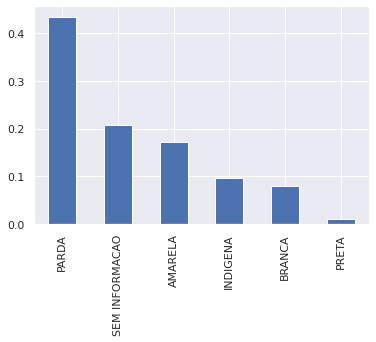

In [32]:
df.paciente_racaCor_valor.value_counts(normalize=True).plot(kind='bar')

In [28]:
df.estabelecimento_razaoSocial.value_counts(normalize=True)

MANAUS SECRETARIA MUNICIPAL DE SAUDE                      0.544024
MINISTERIO DA SAUDE                                       0.043759
SOCIEDADE PORTUGUESA BENEFICENTE DO AMAZONAS              0.024028
PREFEITURA MUNICIPAL DE ITACOATIARA                       0.020149
DISTRITO SANITARIO ESPECIAL INDIGENA DO ALTO RIO NEGRO    0.019570
                                                            ...   
FUNDO MUNICIPAL DE SAUDE                                  0.000073
MUNICIPIO DE SAO PAULO DE OLIVENCA                        0.000048
PREFEITURA MUNICIPAL DE AMATURA                           0.000040
MUNICIPIO DE GUAJARA                                      0.000034
PREFEITURA MUNICIPAL DE SAUDE DE IRANDUBA                 0.000001
Name: estabelecimento_razaoSocial, Length: 135, dtype: float64

In [36]:
df.paciente_idade.value_counts(normalize=True)

60     0.047003
61     0.046742
62     0.045196
63     0.037163
64     0.028674
         ...   
113    0.000001
5      0.000001
114    0.000001
1      0.000001
126    0.000001
Name: paciente_idade, Length: 117, dtype: float64

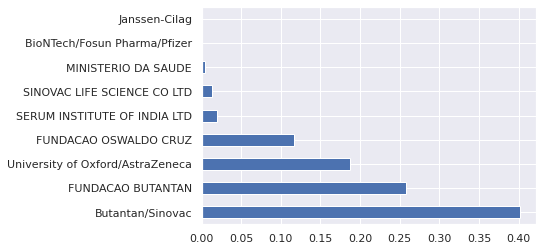

In [93]:
df.vacina_fabricante_nome.value_counts(normalize=True).plot(kind='barh')

In [24]:
df.describe(include='all')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
count,682321,682321,682321.00000,682321,682321,682321.000000,682321,675216.000000,675259.000000,675238,675259,675216,556241.000000,681911,6.823210e+05,682321,682321,682321.000000,682321,682321,682321.000000,667865,667865.000000,667865,682321,682321,257637,682321,682321,682321.000000,682321,682321,682321,682321.000000
unique,682245,510994,NaN,29458,2,NaN,6,NaN,NaN,1719,7,28,NaN,3,NaN,135,435,NaN,62,1,NaN,66,NaN,14,81,9,3,188,3,NaN,5,3,228228,NaN
top,76982ed7-a92c-466b-ad98-b9c0dc25cd10-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,NaN,1960-01-01,F,NaN,PARDA,NaN,NaN,MANAUS,BRASIL,AM,NaN,B,NaN,MANAUS SECRETARIA MUNICIPAL DE SAUDE,USF DR LUIZ MONTENEGRO,NaN,MANAUS,AM,NaN,Pessoas de 60 a 64 anos,NaN,Faixa Etária,202010025,Butantan/Sinovac,Organization/61189445000156,2021-02-08T00:00:00.000Z,1ª Dose,NaN,Covid-19-Coronavac-Sinovac/Butantan,SMV,2021-04-19 20:33:39,NaN
freq,2,5,NaN,148,370647,NaN,296310,NaN,NaN,391336,675237,648794,NaN,676566,NaN,371199,122889,NaN,408158,682321,NaN,128970,NaN,314557,127832,274554,175597,16175,510692,NaN,463430,402179,18065,NaN
mean,NaN,NaN,54.30498,NaN,NaN,23.122907,NaN,134003.010524,10.005314,NaN,NaN,NaN,68949.365636,NaN,3.166808e+06,NaN,NaN,130247.463239,NaN,NaN,451.378637,NaN,4.540292,NaN,NaN,NaN,NaN,NaN,NaN,85.694200,NaN,NaN,NaN,17501.300684
std,NaN,NaN,17.57767,NaN,NaN,38.846472,NaN,30780.014887,1.008633,NaN,NaN,NaN,5257.471310,NaN,2.077503e+06,NaN,NaN,86.129803,NaN,NaN,326.131648,NaN,3.172695,NaN,NaN,NaN,NaN,NaN,NaN,0.507165,NaN,NaN,NaN,906.765757
min,NaN,NaN,0.00000,NaN,NaN,1.000000,NaN,110001.000000,10.000000,NaN,NaN,NaN,0.000000,NaN,7.089000e+04,NaN,NaN,130002.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,16341.000000
25%,NaN,NaN,40.00000,NaN,NaN,3.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69053.000000,NaN,2.013916e+06,NaN,NaN,130260.000000,NaN,NaN,201.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,16341.000000
50%,NaN,NaN,60.00000,NaN,NaN,3.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69093.000000,NaN,2.016702e+06,NaN,NaN,130260.000000,NaN,NaN,204.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.000000,NaN,NaN,NaN,18183.000000
75%,NaN,NaN,66.00000,NaN,NaN,5.000000,NaN,130260.000000,10.000000,NaN,NaN,NaN,69415.000000,NaN,3.441784e+06,NaN,NaN,130260.000000,NaN,NaN,701.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.000000,NaN,NaN,NaN,18183.000000


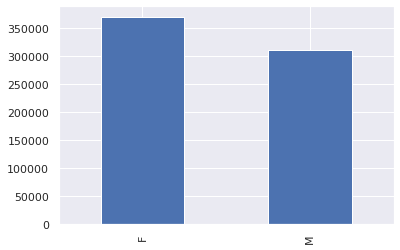

In [46]:
df.paciente_enumSexoBiologico.value_counts().plot(kind='bar')

In [78]:
df.vacina_dataAplicacao = pd.to_datetime(df.vacina_dataAplicacao)

In [79]:
df['vacina_dataAplicacao']= df.vacina_dataAplicacao.dt.date

In [80]:
df.vacina_dataAplicacao.value_counts()

2021-02-09    19602
2021-02-08    18262
2021-03-03    17785
2021-03-05    17480
2021-03-04    16710
              ...  
2021-01-17       13
2021-04-23       13
2021-01-18        7
2021-01-08        3
2021-01-01        1
Name: vacina_dataAplicacao, Length: 100, dtype: int64

In [95]:
df.vacina_dataAplicacao = pd.to_datetime(df.vacina_dataAplicacao)

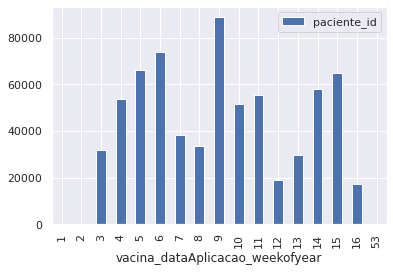

In [91]:
df.groupby(['vacina_dataAplicacao_weekofyear']).agg({'paciente_id':'count'}).plot(kind=)

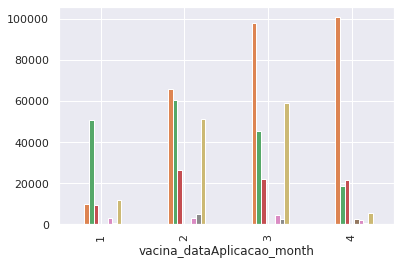

In [106]:
df.groupby(['vacina_dataAplicacao_month', 'vacina_fabricante_nome']).agg({'paciente_id':'count'}).unstack().plot(kind='bar',legend=False)

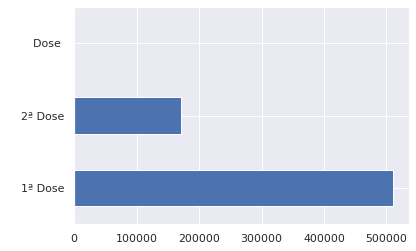

In [110]:
df['vacina_descricao_dose'].value_counts().plot(kind='barh')